## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

y [ 6.07033987  1.52195839  5.25616387 14.4453332   0.77627139  9.33904288
 14.68865244  8.42570064 17.5491784   8.66847426 15.19394873 15.35905204
 16.54318083 12.18060843  9.44522735 15.30788918 16.13389468  7.31919633
 14.441449    3.39943267]
[14.19291915]


array([20.0158563])

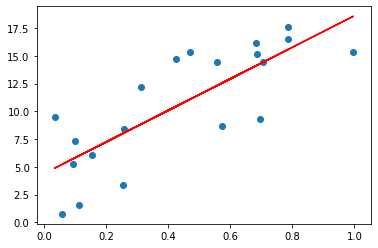

In [20]:
# you code here
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
random_data = np.random.random((20, 2))
X = random_data[:, 0]
# y = random_data[:, 1]
def assmuing_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5)
y = [assmuing_function(x) for x in X]

##1、 线性回归

y = np.array(y)
print('y',y)

reg = LinearRegression().fit(X.reshape(-1, 1), y)
reg.score(X.reshape(-1, 1), y)
print(reg.coef_)

reg.coef_ # 系数
reg.intercept_ # 
def f(x): 
    return reg.coef_ * x + reg.intercept_
plt.scatter(X, y)
plt.plot(X, f(X), color='red')



In [21]:
## 2、预测新数据
reg.predict([[0.9]])

array([17.17727247])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [99]:
# you code here

# 数据A函数
def assmuing_function_a(x):
    return 13.4 * x + 5 + random.randint(-5, 5)

def assmuing_function_b(x):
    return 11.23 * x + 6 + random.randint(-15, 15)


def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

# 生成数据
def creat_data(f):
    random_data = np.random.random((20, 2))
    X = random_data[:, 0]
    y = [f(x) for x in X]
    return model(X, y)

# 生成AB两种类型的数据    
data_a = creat_data(f=assmuing_function_a)
data_b = creat_data(f=assmuing_function_b)
all_data = data_a + data_b


# 计算两点距离
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return cosine(x1, x2)

# 出现次数
def frequency(similars, target):
    count = 0
    for data in similars:        
        if data in target:
            count+= 1
    print('count', count)
    return count

    
def get_similars(position, k=5):
    # 最近的K个点
    most_similars = sorted(all_data, key=lambda xi: distance(xi, position))[:k]
    return most_similars  

def decision(new_data):
    similars = get_similars(new_data)
    # 判断新数据属于哪种类型的数据
    if frequency(similars, data_a) > frequency(similars, data_b):
        return 'A'
    else: 
        return 'B'
    

decision(np.random.random(2))    


count 1
count 4


'B'

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [115]:
# you code here
from collections import Counter
from icecream import ic

def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

entropy([1, 1, 1, 1])

mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset
# split_by_gender: 
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_some_feature: 
entropy([1, 1, 1, 1]) + entropy([0, 0, 0])
set(mock_data['family_number'])
set(mock_data['gender'])
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()



ic| probs: [1.0]
ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565


In [117]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [118]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'pet'
ic| values: {0, 1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1

spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

X1 [78, 40, 44, 100, 86, 92, 31, 76, 48, 2, 0, 42, 57, 45, 69, 84, 16, 24, 46, 31, 85, 87, 38, 65, 44, 31, 30, 84, 54, 87, 4, 95, 71, 69, 39, 60, 27, 93, 67, 25, 57, 18, 17, 17, 73, 40, 55, 91, 59, 81, 49, 10, 89, 52, 16, 8, 92, 90, 46, 43, 22, 72, 81, 88, 2, 70, 100, 9, 45, 44, 98, 63, 54, 64, 73, 67, 70, 51, 94, 98, 14, 32, 97, 79, 80, 48, 55, 54, 56, 99, 1, 47, 1, 36, 65, 60, 93, 98, 24, 48]
cluster KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
randint 40
centers[label] [[40, 87], [31, 81], [48, 58], [57, 81], [24, 99], [46, 94], [38, 97], [54, 55], [57, 80], [40, 57], [55, 93], [59, 63], [49, 88], [52, 90], [46, 79], [45, 94], [51, 69], [32, 84], [55, 91], [47, 65], [36, 88], [48, 61]]


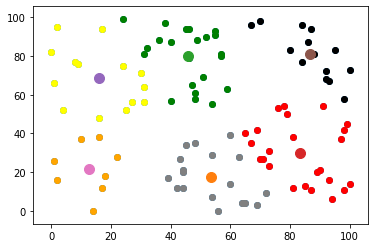

In [127]:
# your code
from sklearn.cluster import KMeans
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster = KMeans(n_clusters=6, max_iter=500)
print('X1', X1)
print('cluster',cluster)

print('randint',random.randint(0, 100))
cluster.fit(tranning_data)
cluster.cluster_centers_
cluster.labels_
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
    
print('centers[label]', centers[label])    
    
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)    

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:
Model是数据进行训练后得到的一种函数
models不能够完全精确的解决所有的问题，它是存在误差的，但是不够完美的Model能够解决大多数实际问题

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:
overfitting：函数会完美拟合训练数据，误差比较小，但是一旦有新的数据，函数也会跟着发生较大变化。 bias比较低，variance比较高
underfitting：函数与训练数据误差比较大，数据发生变化后，函数不用发生变化，bias比较高，variance比较低


<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

In [133]:
Precision：所有预测是A 且预测正确的个数 / 所有预测结果是A的个数
recall: 所有预测是A且正确的个数 / 所有结果是A的个数
AUC： 随着预测准确把握程度的增长，准确度的变化
F1 Score：平衡precision和recall; F1 score = 2 * precision * recall / (precision + recall)
F2 Score: F1 score = 5 * precision * recall / 4 * (precision + recall)
    当精确率更重要，使用F1 Score，如果召回率更重要，使用F2 Score

SyntaxError: invalid syntax (<ipython-input-133-f10b307bb678>, line 1)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 函数是可以通过训练和学习得到，有新的数据能够自动预测结果，程序员不用加班改规则了

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

In [ ]:
没有毛病，没有100%完美的模型能够符合所有的评判标准，有了评判标准作为方向，在设计模型的时候就有侧重点

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [243]:
# you code here
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset

def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     ic(probs)
    return - sum(p * np.log(p) for p in probs)

# 找到最佳属性
def find_optimal_spliter (training_data: pd.DataFrame, target:str) -> str:
    x_field = set(training_data.columns.tolist()) - {target} 
    spliter = None
    spliter_map = set()
    min_entropy = float('inf')
    for field in x_field:
        values = set(training_data[field])
        for v in values:
            sub_spliter_1 = training_data[training_data[field] == v][target].tolist()
            sub_spliter_2 = training_data[training_data[field] != v][target].tolist()            
            entropy_v = entropy(sub_spliter_1) + entropy(sub_spliter_2)
#             d = {}
#             d[field] = (field, v, entropy_v)

            spliter_map = spliter_map | {(field, v, entropy_v)} 

            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (field, v)
    spliter_map = sorted(spliter_map, key=lambda x: x[2])

    optimal_feature = []
    for i in spliter_map:
        if i[0] not in optimal_feature:
            optimal_feature.append(i[0])
        
    print('optimal_feature is: {}'.format(optimal_feature))
    print('spliter_map is: {}'.format(spliter_map))
#     print('spliter is: {}'.format(spliter))
#     print('the min entropy is: {}'.format(min_entropy))
    return optimal_feature, spliter_map


find_optimal_spliter(training_data = dataset, target='bought')    
    

optimal_feature is: ['pet', 'family_number', 'income', 'gender']
spliter_map is: [('pet', 1, -0.0), ('pet', 0, -0.0), ('family_number', 1, 0.6730116670092565), ('family_number', 2, 0.6730116670092565), ('income', '-10', 0.6730116670092565), ('income', '+10', 0.6730116670092565), ('gender', 'M', 1.198849312913621), ('gender', 'F', 1.198849312913621)]


(['pet', 'family_number', 'income', 'gender'],
 [('pet', 1, -0.0),
  ('pet', 0, -0.0),
  ('family_number', 1, 0.6730116670092565),
  ('family_number', 2, 0.6730116670092565),
  ('income', '-10', 0.6730116670092565),
  ('income', '+10', 0.6730116670092565),
  ('gender', 'M', 1.198849312913621),
  ('gender', 'F', 1.198849312913621)])

In [266]:
def feature_probs_in_traning_data(training_data: pd.DataFrame,target:str):
    x_field = set(training_data.columns.tolist()) - {target} ;
    feature_probs = dict()
    for field in x_field:
        values = set(training_data[field])
        for v in values:
            sub_spliter_1 = training_data[training_data[field] == v][target].tolist()
            probs = sub_spliter_1.count(1) / len(sub_spliter_1)

            if field not in feature_probs:
                feature_probs[field] = dict()
            feature_probs[field][v] = probs
#     print('feature_probs', feature_probs)
    return feature_probs


#训练数据中每种属性对应结果的概率        
feature_probs_in_traning_data(training_data = dataset, target='bought')

{'family_number': {1: 0.4, 2: 1.0},
 'pet': {0: 0.0, 1: 1.0},
 'gender': {'F': 0.75, 'M': 0.3333333333333333},
 'income': {'-10': 1.0, '+10': 0.4}}

In [320]:
test_data = {
    'gender':'M',
    'income':'+10',
    'family_number': 2
}
def decistion_tree_model(data, target: str):
    optimal_spliter, spliter_map = find_optimal_spliter(training_data = dataset, target=target)    
    feature_probs = feature_probs_in_traning_data(training_data = dataset, target=target)
#     def 
    prob = 0
    for feature in optimal_spliter:        
        if feature in data:
            print('feature',feature, feature_probs[feature], feature_probs[feature][data[feature]])
            # 发生的概率
            if feature_probs[feature][data[feature]] == 1:
                return 1
                break
            elif feature_probs[feature][data[feature]] == 0:
                return 0
                break
            else:
                prob = feature_probs[feature][data[feature]]
#             elif feature_probs[feature][data[feature]] > prob:
#               # 取较大的概率
#                 prob = feature_probs[feature][data[feature]]
    return prob 
  
decistion_tree_model(test_data, target = 'bought')

optimal_feature is: ['pet', 'family_number', 'income', 'gender']
spliter_map is: [('pet', 1, -0.0), ('pet', 0, -0.0), ('family_number', 1, 0.6730116670092565), ('family_number', 2, 0.6730116670092565), ('income', '-10', 0.6730116670092565), ('income', '+10', 0.6730116670092565), ('gender', 'M', 1.198849312913621), ('gender', 'F', 1.198849312913621)]
feature family_number {1: 0.4, 2: 1.0} 1.0


1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [5]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)